# Feature importance per signature type

This notebooks analyses which characters are more important for each individual signature type. In other words, what makes each cluster unique compared to all the other.

In [110]:
import numpy as np
import pandas as pd
import geopandas as gpd
import dask.dataframe
import matplotlib.pyplot as plt
import urbangrammar_graphics as ugg
import seaborn as sns

from matplotlib.lines import Line2D
from sklearn.ensemble import RandomForestClassifier

In [3]:
%time standardized_form = dask.dataframe.read_parquet("../../urbangrammar_samba/spatial_signatures/clustering_data/form/standardized/").set_index('hindex')
%time stand_fn = dask.dataframe.read_parquet("../../urbangrammar_samba/spatial_signatures/clustering_data/function/standardized/")
%time data = dask.dataframe.multi.concat([standardized_form, stand_fn], axis=1).replace([np.inf, -np.inf], np.nan).fillna(0)
%time data = data.drop(columns=["keep_q1", "keep_q2", "keep_q3"])
%time data = data.compute()

CPU times: user 19.2 s, sys: 3.26 s, total: 22.5 s
Wall time: 21.4 s
CPU times: user 72.3 ms, sys: 4.09 ms, total: 76.4 ms
Wall time: 116 ms
CPU times: user 39.6 ms, sys: 7.9 ms, total: 47.5 ms
Wall time: 41.4 ms
CPU times: user 18.9 ms, sys: 0 ns, total: 18.9 ms
Wall time: 18.7 ms
CPU times: user 2min 41s, sys: 1min 27s, total: 4min 8s
Wall time: 2min 45s


In [4]:
labels_l1 = pd.read_parquet("../../urbangrammar_samba/spatial_signatures/clustering_data/KMeans10GB.pq")
labels_l2_9 = pd.read_parquet("../../urbangrammar_samba/spatial_signatures/clustering_data/clustergram_cl9_labels.pq")
labels_l2_2 = pd.read_parquet("../../urbangrammar_samba/spatial_signatures/clustering_data/subclustering_cluster2_k3.pq")
labels = labels_l1.copy()
labels.loc[labels.kmeans10gb == 9, 'kmeans10gb'] = labels_l2_9['9'].values + 90
labels.loc[labels.kmeans10gb == 2, 'kmeans10gb'] = labels_l2_2['subclustering_cluster2_k3'].values + 20

outliers = [98, 93, 96, 97]
mask = ~labels.kmeans10gb.isin(outliers)

## Feature importance per cluster

In [15]:
labels.kmeans10gb.unique()

array([ 4,  0,  6,  1, 21,  7,  3,  5, 90, 20,  8, 22, 98, 92, 94, 91, 95,
       96, 93, 97], dtype=int32)

In [19]:
imps = pd.DataFrame()

In [21]:
for cluster in labels.kmeans10gb.unique():
    if cluster not in outliers:
        cluster_bool = labels.loc[mask]['kmeans10gb'].apply(lambda x: 1 if x == cluster else 0)

        clf = RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=42, verbose=1)
        clf = clf.fit(data.loc[mask].values, cluster_bool.values)

        importances = pd.Series(clf.feature_importances_, index=data.columns).sort_values(ascending=False)

        imps[f'cluster_{cluster}'] = importances.head(50).index.values
        imps[f'cluster_{cluster}_vals'] = importances.head(50).values

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 13.6min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 10.4min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  5.8min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  6.6min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  6.0min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  7.9min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.


In [26]:
chars = [c for c in imps.columns if 'vals' not in c]
imps[sorted(chars)]

,cluster_0,cluster_1,cluster_20,cluster_21,cluster_22,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_90,cluster_91,cluster_92,cluster_94,cluster_95
0,sicCAR_q1,ltcWRE_q3,ssbCCM_q2,stbCeA_q1,sdbPer_q2,ldsAre_q1,sdcLAL_q1,ssbElo_q1,lcnClo_q3,mdcAre_q2,linPDE_q2,sdbPer_q2,sdbAre_q1,ssbCCD_q2,ssbERI_q2,sicCAR_q2
1,sicCAR_q2,ltcRea_q3,ssbCCM_q3,linP4W_q2,ssbCCM_q2,mdsAre_q1,sicCAR_q2,ssbCCM_q3,lcnClo_q2,sicCAR_q2,lcdMes_q3,ssbERI_q1,"G, I. Distribution, hotels and restaurants_q2",ssbCCM_q2,ssbCCM_q2,C. Manufacturing_q2
2,ltbIBD_q2,ltcAre_q2,sdbAre_q3,stbCeA_q2,sdbPer_q3,sddAre_q2,sicCAR_q1,ssbElo_q2,ldePer_q1,mtdMDi_q2,lcdMes_q2,ssbCCM_q2,"K, L, M, N. Financial, real estate, profession...",ssbSqu_q3,ssbCCD_q2,"R, S, T, U. Other_q2"
3,sdcAre_q2,sdcAre_q2,population_q3,ldeAre_q2,sdbAre_q2,sicCAR_q2,sdcAre_q2,ssbCCo_q1,ldeAre_q2,sicCAR_q1,ssbERI_q1,ssbSqu_q3,"R, S, T, U. Other_q2","K, L, M, N. Financial, real estate, profession...",ssbCor_q2,"G, I. Distribution, hotels and restaurants_q2"
4,sddAre_q2,misCel_q1,sdbPer_q2,stcOri_q2,population_q3,lddNDe_q3,mtcWNe_q3,ssbCCD_q2,lcnClo_q1,mdsAre_q1,ssbCCo_q1,sdbAre_q2,"G, I. Distribution, hotels and restaurants_q3",sdbPer_q2,"K, L, M, N. Financial, real estate, profession...",sicCAR_q1
5,mtdMDi_q2,misCel_q2,sdbAre_q2,ssbERI_q1,ssbSqu_q3,mdsAre_q2,mdsAre_q1,sdbPer_q3,ltcWRE_q3,sscCCo_q2,population_q1,ssbCCD_q3,"K, L, M, N. Financial, real estate, profession...",sdbPer_q3,"G, I. Distribution, hotels and restaurants_q2",C. Manufacturing_q3
6,mdsAre_q1,lisCel_q2,ldePer_q1,linP4W_q1,ssbCCD_q3,sicCAR_q1,ltcAre_q1,sdsSPW_q2,linP4W_q2,mdcAre_q1,ssbElo_q2,"K, L, M, N. Financial, real estate, profession...",C. Manufacturing_q2,sdbAre_q2,sdbPer_q2,ssbCCM_q2
7,Code_18_112_q2,mtcWNe_q1,lteOri_q2,ldePer_q1,"K, L, M, N. Financial, real estate, profession...",ldeAre_q2,sdcAre_q3,ssbCCo_q2,sddAre_q1,sisBpM_q2,mdsAre_q2,"G, I. Distribution, hotels and restaurants_q2",sdbPer_q2,"G, I. Distribution, hotels and restaurants_q2",ssbSqu_q3,sdbPer_q2
8,mtcWNe_q2,ltcAre_q1,sdbPer_q3,linPDE_q1,ssbERI_q1,lseCWA_q3,mtbNDi_q2,ltcAre_q1,sddAre_q2,ltcAre_q1,sdsAre_q3,sdbPer_q3,ssbCCM_q2,ssbCor_q3,"K, L, M, N. Financial, real estate, profession...",sdsSPO_q2
9,sdcLAL_q2,lisCel_q1,ldeAre_q1,lteOri_q1,"R, S, T, U. Other_q2",sdcAre_q2,ltbIBD_q2,sdbPer_q2,ltcWRE_q2,sddAre_q3,ssbCCo_q2,sdbAre_q1,Code_18_211_q1,ssbCCD_q3,ssbCCM_q1,mean_q3


In [25]:
imps.to_parquet("../../urbangrammar_samba/spatial_signatures/clustering_data/per_cluster_importance.pq")

In [3]:
ims = pd.read_parquet("../../urbangrammar_samba/spatial_signatures/clustering_data/per_cluster_importance.pq")

In [104]:
names.columns

Index(['cluster_4', 'cluster_0', 'cluster_6', 'cluster_1', 'cluster_21',
       'cluster_7', 'cluster_3', 'cluster_5', 'cluster_90', 'cluster_20',
       'cluster_8', 'cluster_22', 'cluster_92', 'cluster_94', 'cluster_91',
       'cluster_95'],
      dtype='object')

In [136]:
n_chars = 10

In [137]:
names = ims[[c for c in ims.columns if "_vals" not in c]].head(n_chars)
values = ims[[c for c in ims.columns if "_vals" in c]].head(n_chars)

In [9]:
coded = {
    'population': 'func_population',
    'night_lights': 'func_night_lights',
    'A, B, D, E. Agriculture, energy and water': 'func_workplace_abde',
    'C. Manufacturing': 'func_workplace_c',
    'F. Construction': 'func_workplace_f',
    'G, I. Distribution, hotels and restaurants': 'func_workplace_gi',
    'H, J. Transport and communication': 'func_workplace_hj',
    'K, L, M, N. Financial, real estate, professional and administrative activities': 'func_workplace_klmn',
    'O,P,Q. Public administration, education and health': 'func_workplace_opq',
    'R, S, T, U. Other': 'func_workplace_rstu',
    'Code_18_124': 'func_corine_124',
    'Code_18_211': 'func_corine_211',
    'Code_18_121': 'func_corine_121',
    'Code_18_421': 'func_corine_421',
    'Code_18_522': 'func_corine_522',
    'Code_18_142': 'func_corine_142',
    'Code_18_141': 'func_corine_141',
    'Code_18_112': 'func_corine_112',
    'Code_18_231': 'func_corine_231',
    'Code_18_311': 'func_corine_311',
    'Code_18_131': 'func_corine_131',
    'Code_18_123': 'func_corine_123',
    'Code_18_122': 'func_corine_122',
    'Code_18_512': 'func_corine_512',
    'Code_18_243': 'func_corine_243',
    'Code_18_313': 'func_corine_313',
    'Code_18_412': 'func_corine_412',
    'Code_18_321': 'func_corine_321',
    'Code_18_322': 'func_corine_322',
    'Code_18_324': 'func_corine_324',
    'Code_18_111': 'func_corine_111',
    'Code_18_423': 'func_corine_423',
    'Code_18_523': 'func_corine_523',
    'Code_18_312': 'func_corine_312',
    'Code_18_133': 'func_corine_133',
    'Code_18_333': 'func_corine_333',
    'Code_18_332': 'func_corine_332',
    'Code_18_411': 'func_corine_411',
    'Code_18_132': 'func_corine_132',
    'Code_18_222': 'func_corine_222',
    'Code_18_242': 'func_corine_242',
    'Code_18_331': 'func_corine_331',
    'Code_18_511': 'func_corine_511',
    'Code_18_334': 'func_corine_334',
    'Code_18_244': 'func_corine_244',
    'Code_18_521': 'func_corine_521',
    'mean': 'func_ndvi',
    'supermarkets_nearest': 'func_supermarkets_nearest',
    'supermarkets_counts': 'func_supermarkets_counts',
    'listed_nearest': 'func_listed_nearest',
    'listed_counts': 'func_listed_counts',
    'fhrs_nearest': 'func_fhrs_nearest',
    'fhrs_counts': 'func_fhrs_counts',
    'culture_nearest': 'func_culture_nearest',
    'culture_counts': 'func_culture_counts',
    'nearest_water': 'func_water_nearest',
    'nearest_retail_centre': 'func_retail_centrenearest',
    'sdbAre': 'form_sdbAre',
    'sdbPer': 'form_sdbPer',
    'sdbCoA': 'form_sdbCoA',
    'ssbCCo': 'form_ssbCCo',
    'ssbCor': 'form_ssbCor',
    'ssbSqu': 'form_ssbSqu',
    'ssbERI': 'form_ssbERI',
    'ssbElo': 'form_ssbElo',
    'ssbCCM': 'form_ssbCCM',
    'ssbCCD': 'form_ssbCCD',
    'stbOri': 'form_stbOri',
    'sdcLAL': 'form_sdcLAL',
    'sdcAre': 'form_sdcAre',
    'sscCCo': 'form_sscCCo',
    'sscERI': 'form_sscERI',
    'stcOri': 'form_stcOri',
    'sicCAR': 'form_sicCAR',
    'stbCeA': 'form_stbCeA',
    'mtbAli': 'form_mtbAli',
    'mtbNDi': 'form_mtbNDi',
    'mtcWNe': 'form_mtcWNe',
    'mdcAre': 'form_mdcAre',
    'ltcWRE': 'form_ltcWRE',
    'ltbIBD': 'form_ltbIBD',
    'sdsSPW': 'form_sdsSPW',
    'sdsSWD': 'form_sdsSWD',
    'sdsSPO': 'form_sdsSPO',
    'sdsLen': 'form_sdsLen',
    'sssLin': 'form_sssLin',
    'ldsMSL': 'form_ldsMSL',
    'mtdDeg': 'form_mtdDeg',
    'lcdMes': 'form_lcdMes',
    'linP3W': 'form_linP3W',
    'linP4W': 'form_linP4W',
    'linPDE': 'form_linPDE',
    'lcnClo': 'form_lcnClo',
    'ldsCDL': 'form_ldsCDL',
    'xcnSCl': 'form_xcnSCl',
    'mtdMDi': 'form_mtdMDi',
    'lddNDe': 'form_lddNDe',
    'linWID': 'form_linWID',
    'stbSAl': 'form_stbSAl',
    'sddAre': 'form_sddAre',
    'sdsAre': 'form_sdsAre',
    'sisBpM': 'form_sisBpM',
    'misCel': 'form_misCel',
    'mdsAre': 'form_mdsAre',
    'lisCel': 'form_lisCel',
    'ldsAre': 'form_ldsAre',
    'ltcRea': 'form_ltcRea',
    'ltcAre': 'form_ltcAre',
    'ldeAre': 'form_ldeAre',
    'ldePer': 'form_ldePer',
    'lseCCo': 'form_lseCCo',
    'lseERI': 'form_lseERI',
    'lseCWA': 'form_lseCWA',
    'lteOri': 'form_lteOri',
    'lteWNB': 'form_lteWNB',
    'lieWCe': 'form_lieWCe',
}

In [107]:
types = {
    0: "Countryside agriculture",
    1: "Accessible suburbia",
    3: "Open sprawl",
    4: "Wild countryside",
    5: "Warehouse/Park land",
    6: "Gridded residential quarters",
    7: "Urban buffer",
    8: "Disconnected suburbia",
    20: "Dense residential neighbourhoods",
    21: "Connected residential neighbourhoods",
    22: "Dense urban neighbourhoods",
    90: "Local urbanity",
    91: "Concentrated urbanity",
    92: "Regional urbanity",
    94: "Metropolitan urbanity",
    95: "Hyper concentrated urbanity",
    93: "outlier",
    96: "outlier",
    97: "outlier",
    98: "outlier",
}

In [149]:
def cmap(name):
    if "_q" in name:
        name = name[:-3]
    if coded[name][:4] == "form":
        return ugg.COLORS[1]
    if coded[name][:4] == "func":
        return ugg.COLORS[4]
    raise ValueError()

In [150]:
x = np.repeat(np.arange(0, 16), n_chars)
y = np.tile(np.arange(0, n_chars), 16) * - 1
colors = names.applymap(cmap).values.T.flatten()
alpha = values.values.T.flatten() / values.values.T.flatten().max()
ticks = [types[int(c[8:])] for c in names.columns]

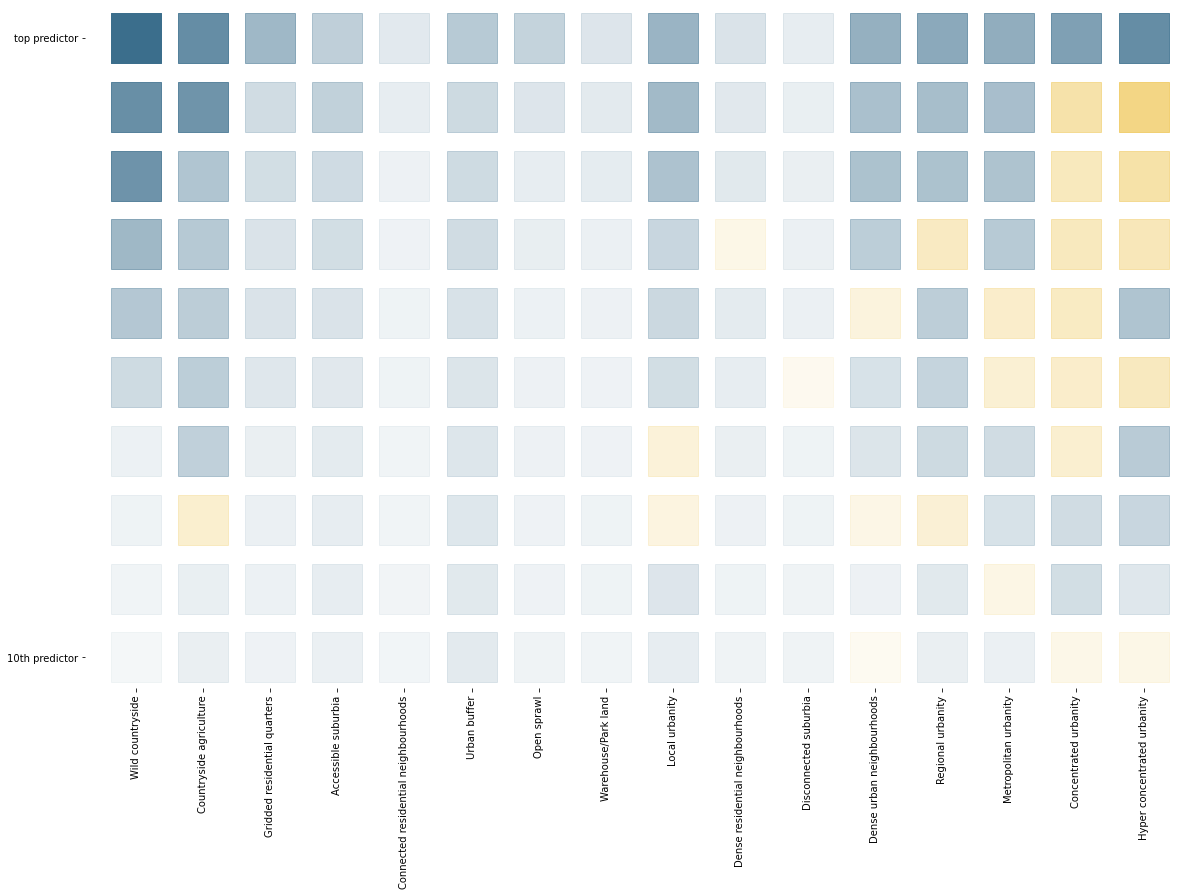

In [152]:
fig, ax = plt.subplots(figsize=(16, n_chars))
ax.scatter(x, y, alpha=alpha, color=colors, marker="s", s=2500)
plt.tight_layout()
# ax.set_axis_off()
plt.xticks(np.arange(0, 16), ticks, rotation='vertical')
plt.yticks([0, -9], ["top predictor", "10th predictor"])
sns.despine(left=True, bottom=True)
# plt.savefig("figs/feature_imp_10.pdf")